In [1]:
# Maize Leaf Disease classfication and Detection Model
# To develop this model we have followed the following steps
   # 1. Collecting dataset
   # 2. Pre-processing images
   # 3. Model training 
   # 4. Model evaluation



#let us import required packages
import tensorflow as tf;
import numpy as np
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model

In [2]:
train_path ="D:/Maize/Train"
test_path ="D:/Maize/Test"
valid_path ="D:/Maize/Valid"
    



In [3]:
x_train = []

for hk in os.listdir(train_path):
    path = train_path+"/"+hk
    for img in os.listdir(path):
        image_path=path+"/"+img
        img_array=cv2.imread(image_path)
        img_array=cv2.resize(img_array,(224,224))
        x_train.append(img_array)
        
    
x_test = []

for hk in os.listdir(test_path):
    path = test_path+"/"+hk
    for img in os.listdir(path):
        image_path=path+"/"+img
        img_array=cv2.imread(image_path)
        img_array=cv2.resize(img_array,(224,224))
        x_test.append(img_array)
    
x_valid = []

for hk in os.listdir(valid_path):
    path = valid_path+"/"+hk
    for img in os.listdir(path):
        image_path=path+"/"+img
        img_array=cv2.imread(image_path)
        img_array=cv2.resize(img_array,(224,224))
        x_valid.append(img_array)
        
        

In [4]:
# let us normalize x_train x_test and x_valid by dividing 255.0

train_x = np.array(x_train)
test_x = np.array(x_test)
valid_x = np.array(x_valid)


In [5]:
train_x = train_x/255.0
test_x = test_x/255.0
valid_x = valid_x/255.0

In [6]:
# Data generators and augmantation --> left out the test set
train_datagen = ImageDataGenerator(
 rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2
)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(
 rescale=1./255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True,
                                 shear_range=0.2
)



In [7]:
training_set = train_datagen.flow_from_directory( train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical"

                                                                 )
test_set = train_datagen.flow_from_directory( test_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical"

                                                                 )
valid_set = train_datagen.flow_from_directory( valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = "categorical"

                                                                 )


Found 2673 images belonging to 4 classes.
Found 836 images belonging to 4 classes.
Found 667 images belonging to 4 classes.


In [8]:
# Lets us look at how the class have been encoded to interpret classification reports
train_y = training_set.classes
test_y = test_set.classes
valid_y = valid_set.classes

training_set.class_indices

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

In [9]:
# let us look at the shape of our data
train_y.shape, test_y.shape, valid_y.shape

((2673,), (836,), (667,))

In [10]:
# model buiding this includes model buiding, model compilation and model fitting

# we are going to use pre trained model as explained in the document summary inception v3
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [11]:
# We are not going to train the pre-trained layers of inceptionv3
for layer in inception.layers:
  layer.trainable = False


In [12]:
# we will customize the model by changing the last layer alone according to our number of our classes
x = Flatten()(inception.output)

In [13]:
# adding output layer Softmax classifier is used for multi-class classification
prediction = Dense(4, activation='softmax')(x)


model = Model(inputs=inception.input, outputs=prediction)


In [14]:
# view structure of our model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [15]:
# Compiling the model we have used categorical_cross-entropy as our loss function and adam as optimizer for the best learning rate
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [16]:
# fit model 
# but let us write a code to avoid overfitting with ealry stopping concept
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


In [17]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(valid_x,valid_y),
  epochs=20,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/20
84/84 [==============================] - 124s 1s/step - loss: 2.2979 - accuracy: 0.7755 - val_loss: 0.5676 - val_accuracy: 0.9010
Epoch 2/20
84/84 [==============================] - 118s 1s/step - loss: 0.3711 - accuracy: 0.9222 - val_loss: 0.8360 - val_accuracy: 0.8696
Epoch 3/20
84/84 [==============================] - 118s 1s/step - loss: 0.1424 - accuracy: 0.9652 - val_loss: 0.5551 - val_accuracy: 0.9010
Epoch 4/20
84/84 [==============================] - 117s 1s/step - loss: 0.2186 - accuracy: 0.9562 - val_loss: 0.7483 - val_accuracy: 0.9130
Epoch 5/20
84/84 [==============================] - 122s 1s/step - loss: 0.2923 - accuracy: 0.9510 - val_loss: 0.9270 - val_accuracy: 0.8921
Epoch 6/20
84/84 [==============================] - 119s 1s/step - loss: 0.1001 - accuracy: 0.9794 - val_loss: 0.8865 - val_accuracy: 0.8831
Epoch 7/20
84/84 [==============================] - 123s 1s/step - loss: 0.0695 - accuracy: 0.9854 - val_loss: 0.7994 - val_accuracy: 0.9115
Epoch 8/20
84

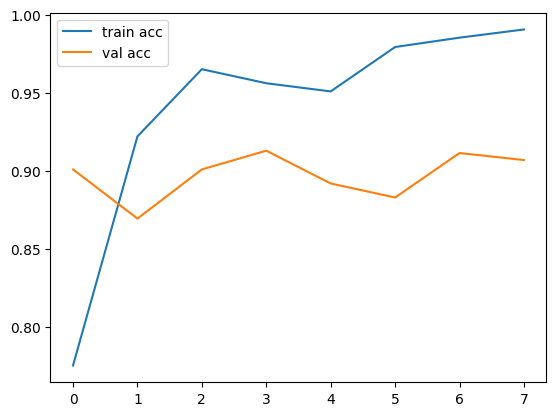

In [18]:
# Visualizing accurancies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()


plt.show() 

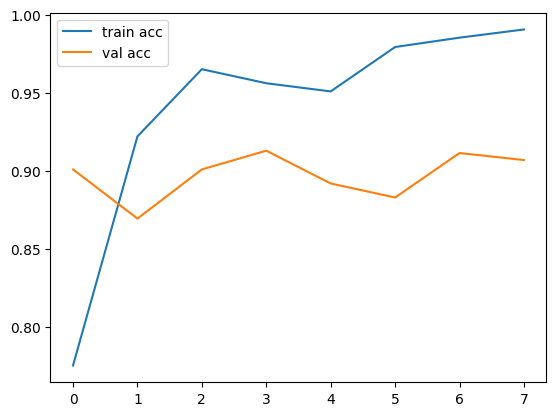

In [19]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()


plt.show()

In [20]:
# Model evaluation on data which the model has not seen during training to obtaion how good our model is

model.evaluate(test_x,test_y,batch_size=32)

27/27 [==============================] - 28s 1s/step - loss: 1.9085 - accuracy: 0.8636


[1.9085081815719604, 0.8636363744735718]

In [21]:
!pip install sklearn


In [22]:
# This will help us obserse our model classification and confusion matrix for further analysis of our model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [23]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

27/27 [==============================] - 29s 1s/step


In [24]:
# Prediction
accuracy_score(y_pred,test_y)

0.8636363636363636

In [25]:
# Classification report
print(classification_report(y_pred,test_y))


              precision    recall  f1-score   support

           0       0.97      0.69      0.81       322
           1       0.82      0.98      0.90       219
           2       0.50      0.90      0.64        63
           3       0.98      0.98      0.98       232

    accuracy                           0.86       836
   macro avg       0.82      0.89      0.83       836
weighted avg       0.90      0.86      0.87       836



In [26]:
# Confusinon matrix
confusion_matrix(y_pred,test_y)

array([[222,  44,  52,   4],
       [  1, 215,   3,   0],
       [  5,   1,  57,   0],
       [  0,   1,   3, 228]], dtype=int64)

In [34]:
model.save("Maize_Class.h5")
